In [1]:
# importaion des libs
import pandas as pd
import glob
import pickle
import cellpermut

In [3]:
# Compute proximity matrix for one ROI

## ROI & radius selection
roi_file = "data/BOISARD ROI002 HLADR NEG.csv"
radius_min = 0
radius_max = 10

## compute matrix
matrix = cellpermut.compute_proximity_matrix(radius_min, radius_max, roi_file)

## save matrix
with open('matrix.pickle', 'wb') as handle:
    pickle.dump(matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

## save matrix as csv
df = pd.DataFrame(matrix)
df.to_csv('matrix.csv', index=False)
df_percentage = df.div(df.sum(axis=1), axis=0) * 100
df_percentage.to_csv('matrix_percentage.csv', index=False)

KeyboardInterrupt: 

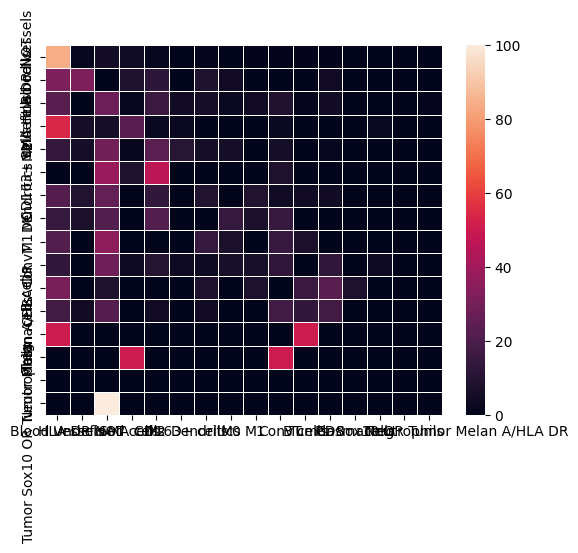

In [4]:
# Compute proximity matrix for all ROI in folder

## ROI & radius selection
folder_file = "data"
matrix_folder = "matrix"
fig_folder = "figures"
radius_min = 0
radius_max = 10

## loop over roi files
for roi_file in glob.glob(f"{folder_file}/*.csv"):

    ## compute matrix
    matrix = cellpermut.compute_proximity_matrix(radius_min, radius_max, roi_file)
    
    ## save matrix
    with open(f"{roi_file.replace('.csv', '_matrix.pickle')}", 'wb') as handle:
        pickle.dump(matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    ## generate heatmap
    fig_name = roi_file.split("\\")[-1].replace('.csv', '_heatmap.png')
    cellpermut.generate_proximity_matrix_heatmap(matrix, f"{fig_folder}/{fig_name}")
    
    ## save matrix as csv
    matrix_file = roi_file.split("\\")[-1].replace('.csv', '_matrix.csv')
    df = pd.DataFrame(matrix)
    df.to_csv(f"{matrix_folder}/{matrix_file}")
    df_percentage = df.div(df.sum(axis=1), axis=0) * 100
    df_percentage.to_csv(f"{matrix_folder}/{matrix_file.replace('.csv', '_percentage.csv')}")

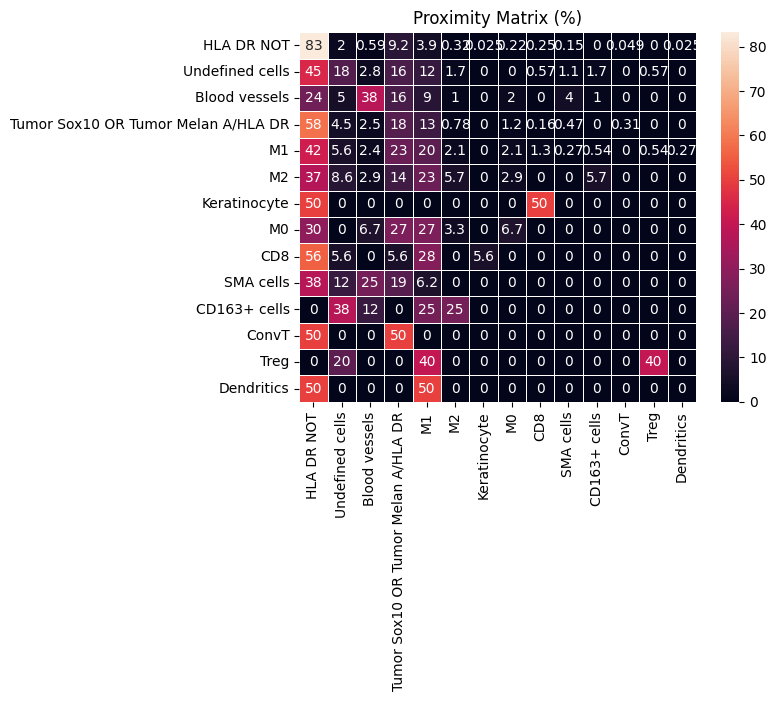

In [5]:
# Display proximity matrix

## load computed matrix
with open('matrix.pickle', 'rb') as handle:
        pop_to_voisin = pickle.load(handle)

## display loaded matrix
cellpermut.display_proximity_matrix(pop_to_voisin)

TypeError: unhashable type: 'dict_keys'

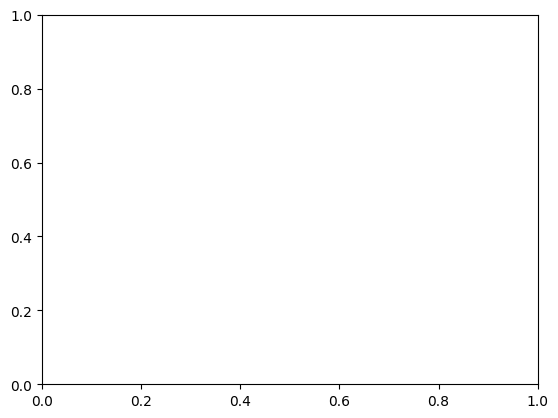

In [10]:
# Display voisinage pour une population (histogram)

## Pick a population to investigate
population = 'ConvT'

## load computed matrix
with open('matrix.pickle', 'rb') as handle:
        pop_to_voisin = pickle.load(handle)

## display histogram
cellpermut.display_voisin_bar(pop_to_voisin, population)

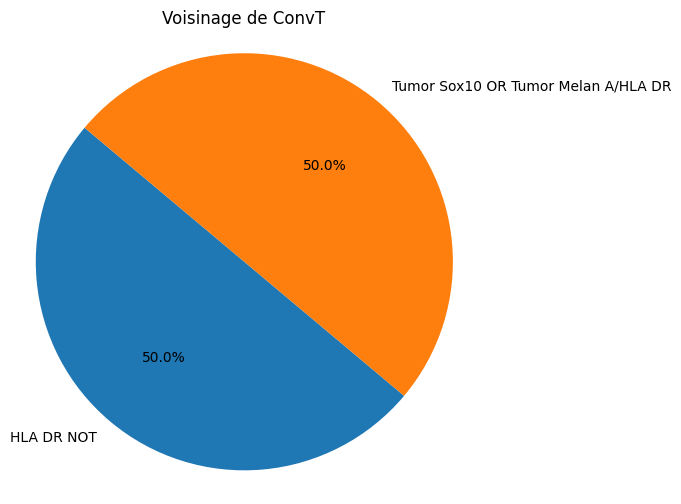

In [9]:
# Display voisinage pour une population (pie chart)

## Pick a population to investigate
population = 'ConvT'

## load computed matrix
with open('matrix.pickle', 'rb') as handle:
        pop_to_voisin = pickle.load(handle)

## display histogram
cellpermut.display_voisin_pie(pop_to_voisin, population)

In [13]:
# Compute proximity matrix for multiple ROI
## !! WARNING !! TRES LONG

## parameters
radius = 10
folder_name = "data"
group_file_name = "data/Groupe.csv"

## compute
result = cellpermut.compute_proximity_matrix_folder(folder_name, groupe_file_name, radius)

## save
with open('multi_matrix.pickle', 'wb') as handle:
    pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)

## save matrix as csv
for pop in result:
    data = result[pop]
    df = pd.DataFrame(data)
    df.to_csv(f"{pop}_matrix.csv", index=False)
    df_percentage = df.div(df.sum(axis=1), axis=0) * 100
    df_percentage.to_csv(f"{pop}_matrix_percentage.csv", index=False)


NameError: name 'groupe_file_name' is not defined

In [14]:
# Display matrix for multiple ROI

## Pick a group to investigate
group = 'NR'

## load computed matrix
with open('multi_matrix.pickle', 'rb') as handle:
        data = pickle.load(handle)

## display histogram
cellpermut.display_class_matrix(data, group)

ValueError: unsupported pickle protocol: 5

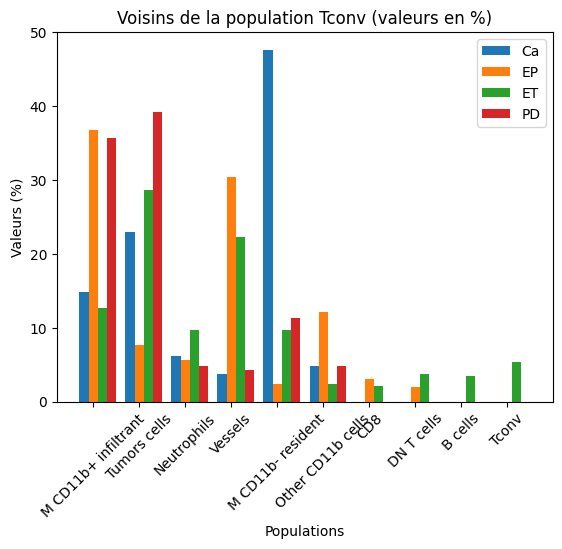

In [2]:
# Display barplot for multiple ROI

## Pick a population to investigate
population = 'Tconv'

## load computed matrix
with open('multi_matrix.pickle', 'rb') as handle:
        data = pickle.load(handle)

## display histogram
cellpermut.display_multiclass_bar(data, population)